# Statistical Relationship between Fire Incidents and Police Reports

- Wanying (Chelsea) Zhao
- April 28, 2021


In [1]:
#Import libraries

import pandas as pd
import numpy as np
from numpy import cov
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [2]:
fire = pd.read_csv("Fire_Incidents.csv")
police = pd.read_csv("Police_Department_Incident_Reports__2018_to_Present.csv")


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (10,12,13,20,38,45,46,55,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#transform column contains date from object to date
fire['Incident Date'] = pd.to_datetime(fire['Incident Date'])
fire['Alarm DtTm'] = pd.to_datetime(fire['Alarm DtTm'])
fire['Arrival DtTm'] = pd.to_datetime(fire['Arrival DtTm'])
fire['Close DtTm'] = pd.to_datetime(fire['Close DtTm'])
police['Incident Date'] = pd.to_datetime(police['Incident Datetime'])
police['Report Datetime2'] = pd.to_datetime(police['Report Datetime'])

In [4]:
#extract information on month, week, day of week, whether incidents happened in weekend, and hour of the day
fire['Incident Year'] = fire['Incident Date'].dt.year
fire['Incident Month'] = fire['Incident Date'].dt.month_name()
fire['Incident Day of Week'] = fire['Incident Date'].dt.day_name()
fire['Incident Date IsWeekend'] = np.where(fire['Incident Date'].dt.weekday < 5, 0, 1)
fire['Incident Date Week'] = fire['Incident Date'].dt.strftime('%U')
fire['Alarm Hour']= fire['Alarm DtTm'].dt.hour
police['Incident Month'] = police['Incident Date'].dt.month_name()
police['Alarm Hour']= police['Report Datetime2'].dt.hour

Since police reports dataset only includes incidents from 2018-2021 and either of the datasets has full-year data for 2021, analysis will only be conducted on data for 2018-2020.

## Trend related to "Year"

In [5]:
a = fire['Incident Year'][(fire['Incident Year']>2017) & (fire['Incident Year']<2021)].value_counts()
fire_year = pd.DataFrame(data=a)
fire_year.reset_index(inplace=True)
fire_year = fire_year.rename(columns = {'index':'Year', 'Incident Year':'Count_of_Incidents'})
fire_year = fire_year.sort_values('Year')
fire_year

,Year,Count_of_Incidents
1,2018,32632
0,2019,33078
2,2020,28850


In [6]:
b = police['Incident Year'][police['Incident Year']<2021].value_counts()
police_year = pd.DataFrame(data=b)
police_year.reset_index(inplace=True)
police_year = police_year.rename(columns = {'index':'Year', 'Incident Year':'Count_of_Incidents'})
police_year = police_year.sort_values('Year')
police_year

,Year,Count_of_Incidents
0,2018,152340
1,2019,147953
2,2020,116965


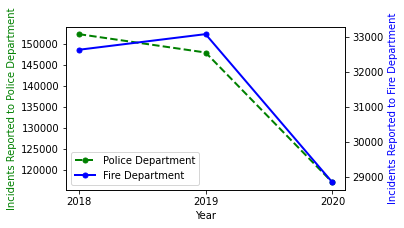

In [7]:
plt.rcParams["figure.figsize"] = (5,3)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(np.asarray(police_year['Year']).astype(str), police_year['Count_of_Incidents'], color='green', marker='o', 
         linestyle='dashed', linewidth=2, markersize=5, label='Police Department')
ax2.plot(np.asarray(fire_year['Year']).astype(str), fire_year['Count_of_Incidents'], color='blue', marker='o', 
         linestyle='-', linewidth=2, markersize=5, label='Fire Department')

ax1.set_xlabel('Year')
ax1.set_ylabel('Incidents Reported to Police Department', color='g')
ax2.set_ylabel('Incidents Reported to Fire Department', color='b')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=0)

plt.show()

In [8]:
corr, _ = pearsonr(police_year['Count_of_Incidents'], fire_year['Count_of_Incidents'])
print('Pearsons correlation for Incidents Count by Year is %.3f' % corr)

Pearsons correlation for Incidents Count by Year is 0.978


## Trend related to "Month"

In [9]:
a = fire['Incident Month'][(fire['Incident Year']>2017) & (fire['Incident Year']<2021)].value_counts()
fire_month = pd.DataFrame(data=a)
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fire_month = fire_month.reindex(new_order, axis=0)
fire_month.reset_index(inplace=True)
fire_month = fire_month.rename(columns = {'index':'Month', 'Incident Month':'Count_of_Incidents'})
fire_month

,Month,Count_of_Incidents
0,January,8453
1,February,7844
2,March,7629
3,April,7317
4,May,7354
5,June,7780
6,July,7890
7,August,8146
8,September,7865
9,October,8442


In [10]:
b = police['Incident Month'][police['Incident Year']<2021].value_counts()
police_month = pd.DataFrame(data=b)
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
police_month = police_month.reindex(new_order, axis=0)
police_month.reset_index(inplace=True)
police_month = police_month.rename(columns = {'index':'Month', 'Incident Month':'Count_of_Incidents'})

police_month

,Month,Count_of_Incidents
0,January,37606
1,February,33954
2,March,33459
3,April,32038
4,May,34397
5,June,33327
6,July,36441
7,August,36977
8,September,34501
9,October,36299


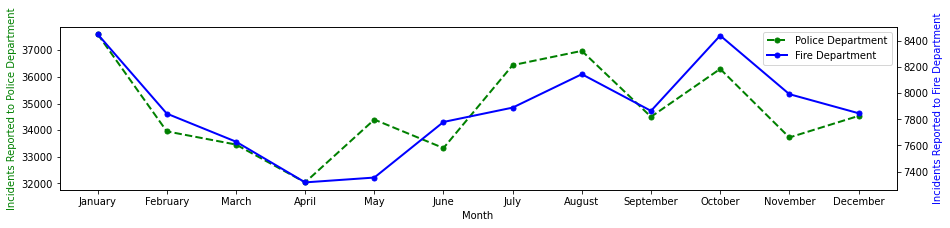

In [11]:
plt.rcParams["figure.figsize"] = (15,3)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(police_month['Month'], police_month['Count_of_Incidents'], color='green', marker='o', 
         linestyle='dashed', linewidth=2, markersize=5, label='Police Department')
ax2.plot(fire_month['Month'], fire_month['Count_of_Incidents'], color='blue', marker='o', 
         linestyle='-', linewidth=2, markersize=5, label='Fire Department')

ax1.set_xlabel('Month')
ax1.set_ylabel('Incidents Reported to Police Department', color='g')
ax2.set_ylabel('Incidents Reported to Fire Department', color='b')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=0)

plt.show()

In [12]:
corr, _ = pearsonr(police_month['Count_of_Incidents'], fire_month['Count_of_Incidents'])
print('Pearsons correlation for Incidents Count by Month is %.3f' % corr)

Pearsons correlation for Incidents Count by Month is 0.789


## Trend related to "Day of the Week"

In [13]:
a = fire['Incident Day of Week'][(fire['Incident Year']>2017) & (fire['Incident Year']<2021)].value_counts()
fire_DayofWeek = pd.DataFrame(data=a)
new_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fire_DayofWeek = fire_DayofWeek.reindex(new_order, axis=0)
fire_DayofWeek.reset_index(inplace=True)
fire_DayofWeek = fire_DayofWeek.rename(columns = {'index':'DayofWeek', 'Incident Day of Week':'Count_of_Incidents'})
fire_DayofWeek

,DayofWeek,Count_of_Incidents
0,Monday,13353
1,Tuesday,13516
2,Wednesday,13953
3,Thursday,13788
4,Friday,13818
5,Saturday,13492
6,Sunday,12640


In [14]:
b = police['Incident Day of Week'][police['Incident Year']<2021].value_counts()
police_DayofWeek = pd.DataFrame(data=b)
new_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
police_DayofWeek = police_DayofWeek.reindex(new_order, axis=0)
police_DayofWeek.reset_index(inplace=True)
police_DayofWeek = police_DayofWeek.rename(columns = {'index':'DayofWeek', 'Incident Day of Week':'Count_of_Incidents'})
police_DayofWeek

,DayofWeek,Count_of_Incidents
0,Monday,59428
1,Tuesday,59212
2,Wednesday,61740
3,Thursday,59048
4,Friday,63361
5,Saturday,59332
6,Sunday,55137


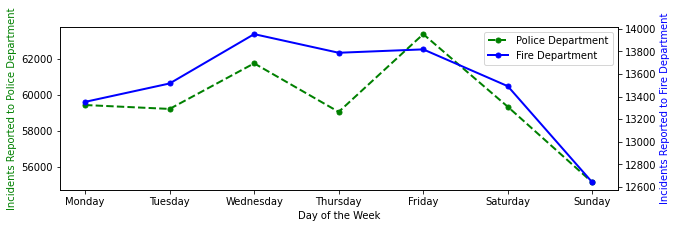

In [15]:
plt.rcParams["figure.figsize"] = (10,3)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(police_DayofWeek['DayofWeek'], police_DayofWeek['Count_of_Incidents'], color='green', marker='o', 
         linestyle='dashed', linewidth=2, markersize=5, label='Police Department')
ax2.plot(fire_DayofWeek['DayofWeek'], fire_DayofWeek['Count_of_Incidents'], color='blue', marker='o', 
         linestyle='-', linewidth=2, markersize=5, label='Fire Department')

ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Incidents Reported to Police Department', color='g')
ax2.set_ylabel('Incidents Reported to Fire Department', color='b')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=0)

plt.show()

In [16]:
corr, _ = pearsonr(police_DayofWeek['Count_of_Incidents'], fire_DayofWeek['Count_of_Incidents'])
print('Pearsons correlation for Incidents Count by Day of week is %.3f' % corr)

Pearsons correlation for Incidents Count by Day of week is 0.873


## Trend related to "Hour of the Day"

In [17]:
a = fire['Alarm Hour'][(fire['Incident Year']>2017) & (fire['Incident Year']<2021)].value_counts()
fire_HourofDay = pd.DataFrame(data=a)
fire_HourofDay.reset_index(inplace=True)
fire_HourofDay = fire_HourofDay.sort_values('index')
fire_HourofDay = fire_HourofDay.rename(columns = {'index':'Alarm_Hour', 'Alarm Hour':'Count_of_Incidents'})


In [18]:
b = police['Alarm Hour'][police['Incident Year']<2021].value_counts()
police_HourofDay = pd.DataFrame(data=b)
police_HourofDay.reset_index(inplace=True)
police_HourofDay = police_HourofDay.sort_values('index')
police_HourofDay = police_HourofDay.rename(columns = {'index':'Alarm_Hour', 'Alarm Hour':'Count_of_Incidents'})


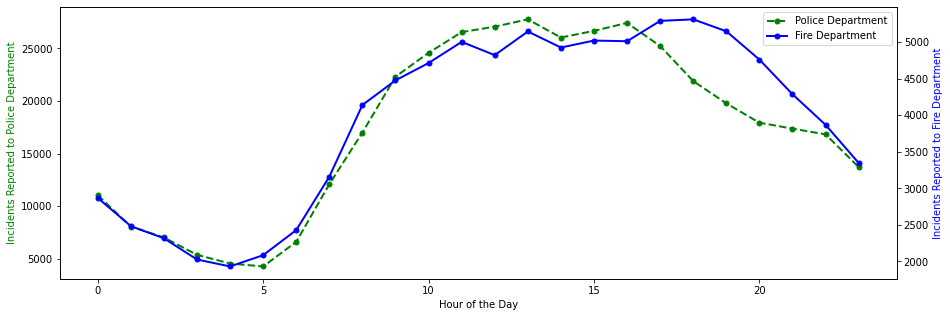

In [19]:
plt.rcParams["figure.figsize"] = (15,5)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(police_HourofDay['Alarm_Hour'], police_HourofDay['Count_of_Incidents'], color='green', marker='o', 
         linestyle='dashed', linewidth=2, markersize=5, label='Police Department')
ax2.plot(fire_HourofDay['Alarm_Hour'], fire_HourofDay['Count_of_Incidents'], color='blue', marker='o', 
         linestyle='-', linewidth=2, markersize=5, label='Fire Department')

ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Incidents Reported to Police Department', color='g')
ax2.set_ylabel('Incidents Reported to Fire Department', color='b')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=0)

plt.show()

In [20]:
corr, _ = pearsonr(police_HourofDay['Count_of_Incidents'], fire_HourofDay['Count_of_Incidents'])
print('Pearsons correlation for Incidents Count by Hour of the Day is %.3f' % corr)

Pearsons correlation for Incidents Count by Hour of the Day is 0.956


### It can be concluded that the number of fire incidents and the number of incidents processed by police are positively correlated from date and time perspectives.